<a href="https://colab.research.google.com/github/Tanishgarg9725/Image-Segmentation-Using-AI/blob/main/image_segmentation_of_map_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

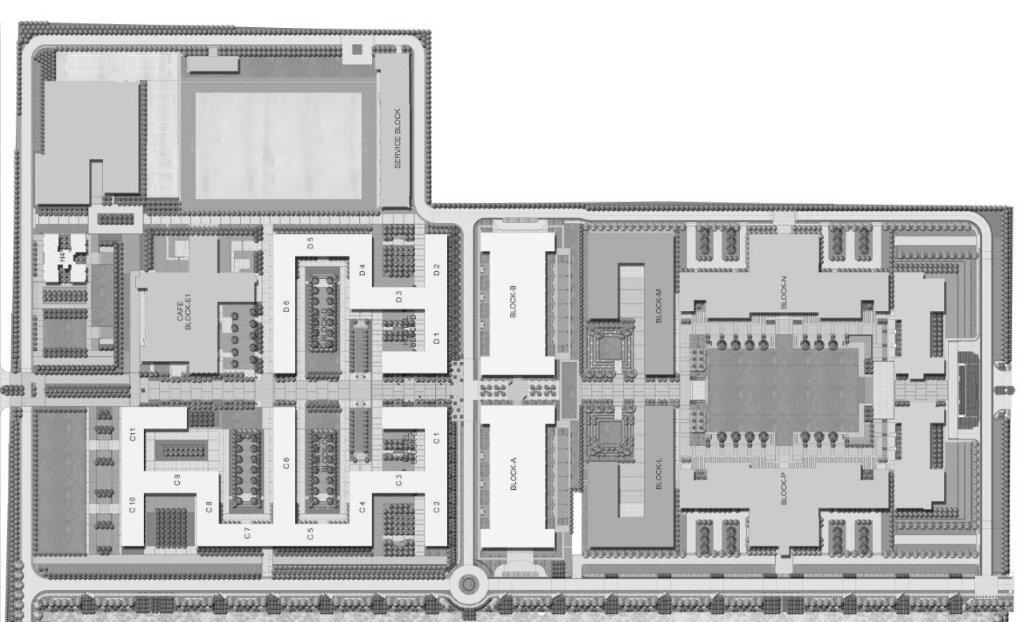

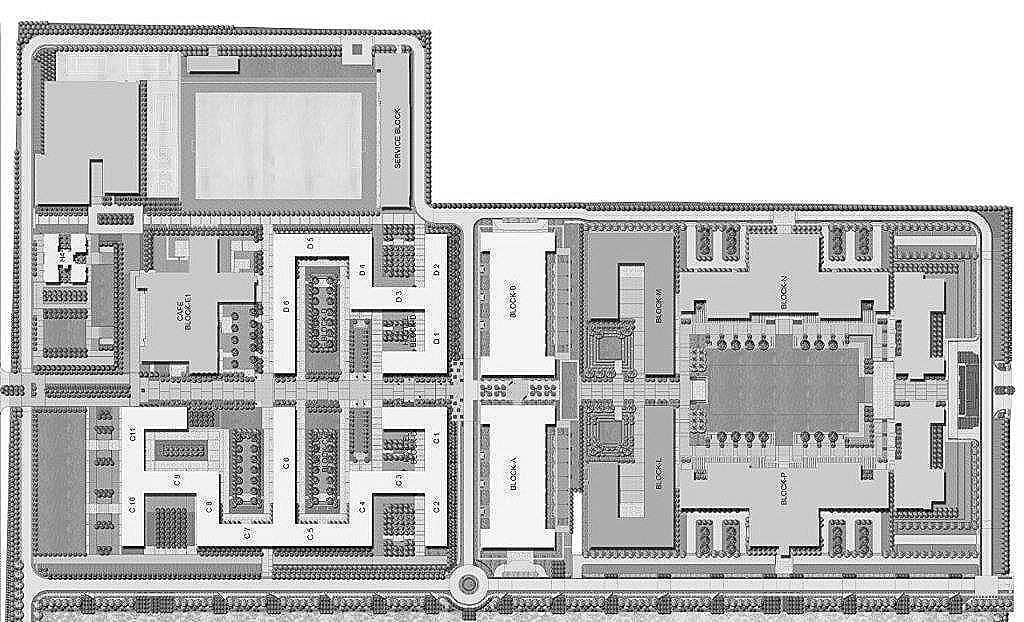

In [ ]:
#Preprocessing the image
import cv2 #cv library used for image and video processing
import numpy as np #library for numerical computations
from google.colab.patches import cv2_imshow #displaying images in google colab environment
#patches library-dividing an image into smaller patches or tiles
#returns list of patches as Numpy arrays

# Loading the image in grayscale mode (each pixel is rep by a single value rep its brightness or intensity) and reading the img
image = cv2.imread("BU Layout 2023.jpg", cv2.IMREAD_GRAYSCALE)

# Checking if the image is loaded correctly
if image is None:
    print("Failed to load image. Please check the file path.")
else:
    # Define the sharpening kernel for edge enhancement as a numpy array
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    #kernel refers to a small matrix or filter used for various operations applied to an image

    # Apply the kernel to the grayscale image
    enhanced_image = cv2.filter2D(image, -1, kernel)

    # Save the enhanced image in the current working directory
    cv2.imwrite('enhanced.jpg', enhanced_image)

    # Display images using cv2_imshow
    cv2_imshow(image)
    cv2_imshow(enhanced_image)


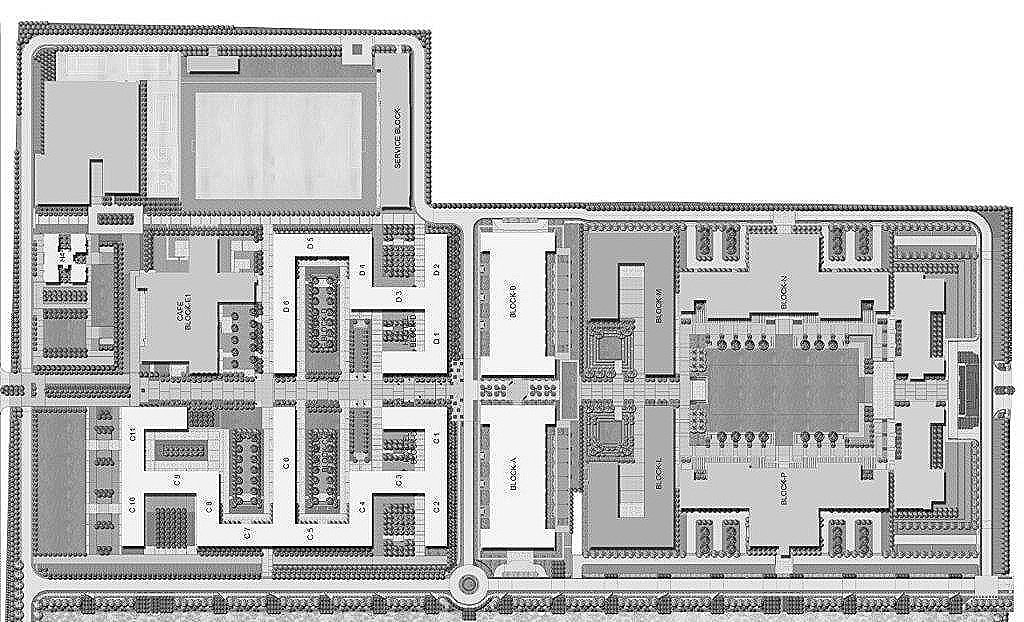

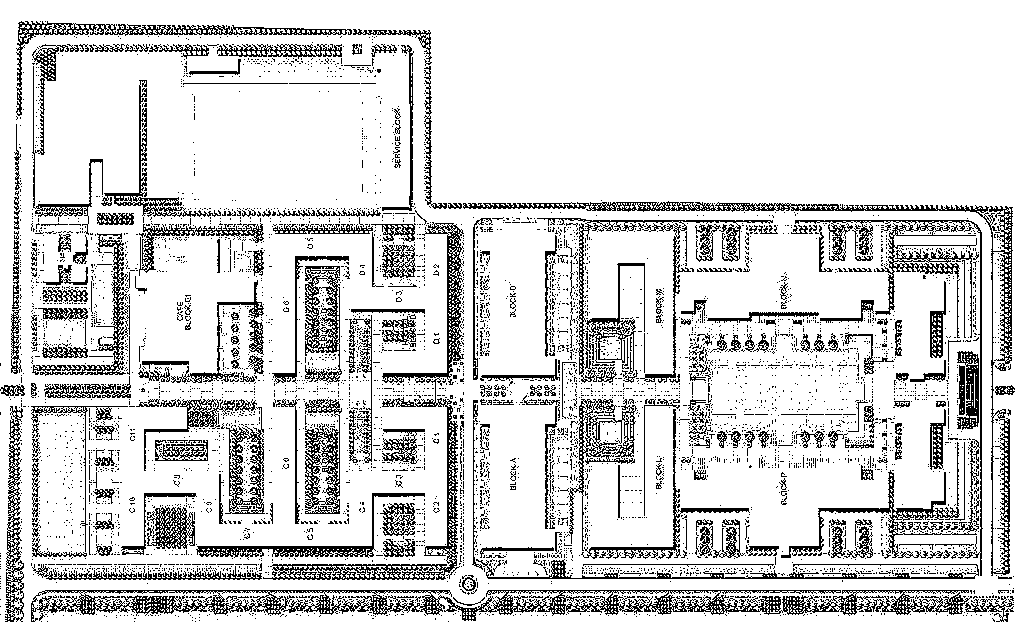

In [ ]:
# BI LEVELING
#Bi-leveling thresholding is an image processing technique used to segment an image into two regions (foreground and background) based on pixel intensity values

import cv2
from google.colab.patches import cv2_imshow #imports the function for displaying images

# Load the enhanced image from previous step
image = cv2.imread('enhanced.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    print("Failed to load image. Please check the file path.")
else:
    # Apply bi-level thresholding
    _, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    #the parameters taken here are image, threshold value (>127=white),cv2.THRESH_BINARY specifies that pixels are set to one of two values

    # Display images using cv2_imshow
    cv2_imshow(image)
    cv2_imshow(thresholded_image)


In [ ]:
!pip install opencv-python pytesseract
#pytesseract is used for text extraction from images(OCR)

In [ ]:
!apt install -y tesseract-ocr
!apt install -y libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,574 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

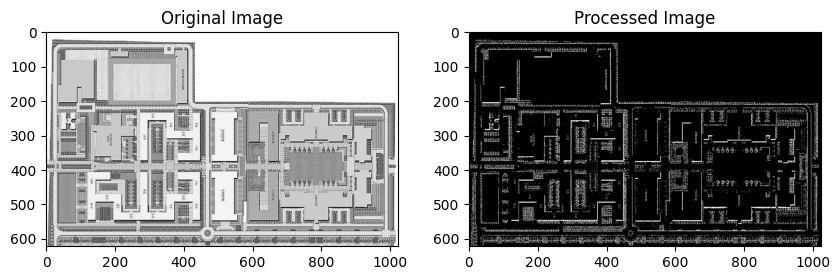

In [ ]:
#OCR
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the enhanced image from previous step
image = cv2.imread('BU Layout 2023.jpg')

img = cv2.imread("enhanced.jpg")

# Check if the image is loaded correctly
if img is None:
    print("Failed to load image. Please check the file path.")
else:
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #
    gray_filtered = cv2.inRange(gray_image, 0, 75)
    cv2.imwrite("cleaned.png", gray_filtered)
    #grayscale image conversion from bgr to rgb

    # Display original and processed images using matplotlib.pyplot
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(gray_filtered, cmap='gray')
    plt.title('Processed Image')
    plt.show()
    #for the process of image visualization


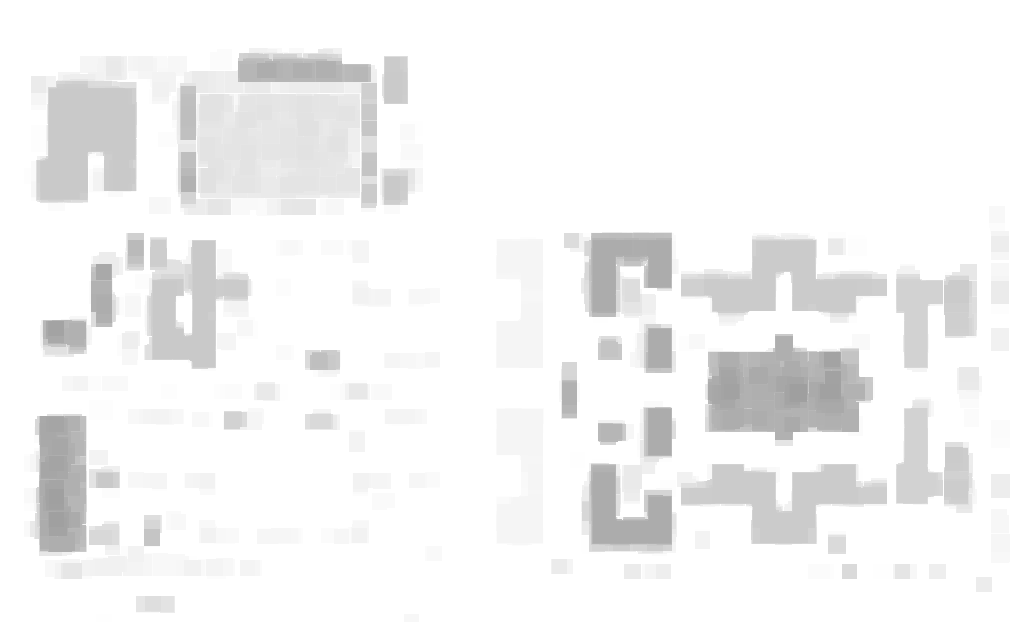

In [ ]:
#image segmentation
import cv2
import numpy as np
img = cv2.imread('bu layout.png', 0)
kernel = np.ones((15, 15), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

from google.colab.patches import cv2_imshow
cv2_imshow(closing)




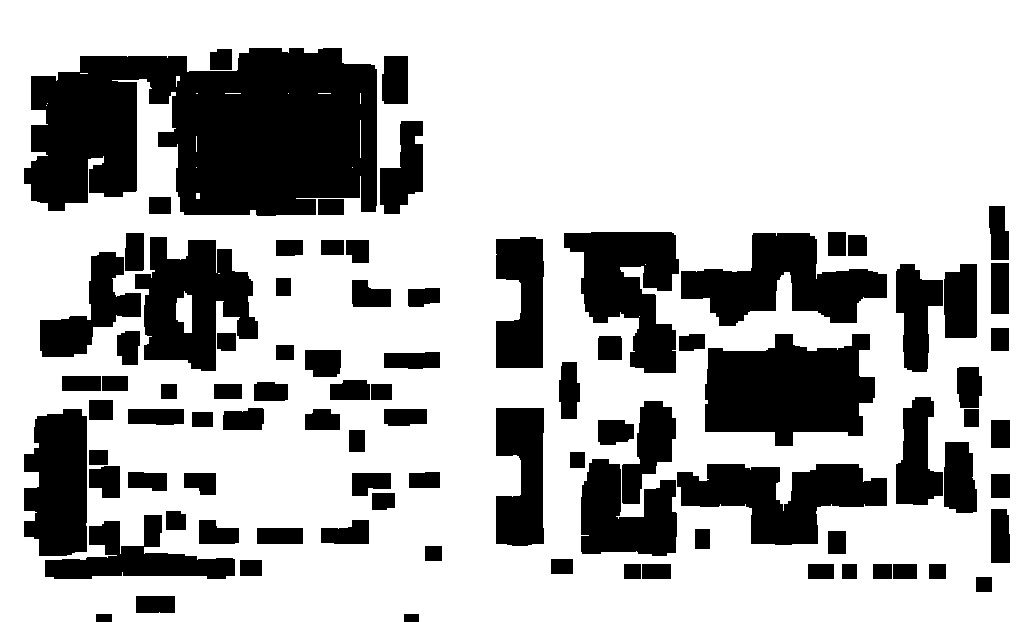

In [ ]:
new = closing.copy()
mask = new < 255
new[mask] = 0
cv2_imshow(new)



In [ ]:
#installation of opencv
!pip install opencv-python

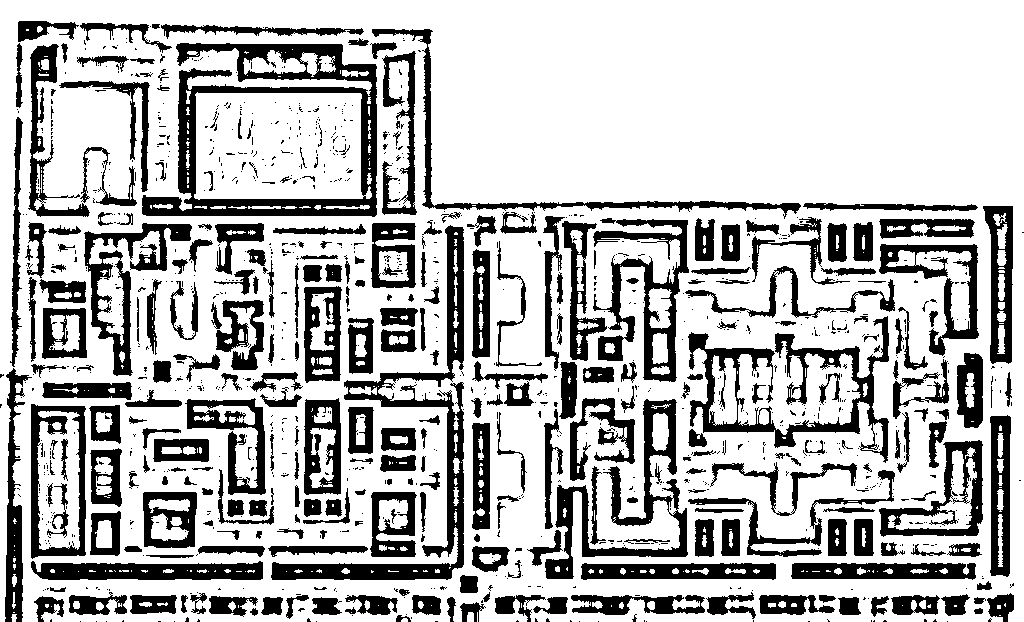

In [ ]:
#Preprocessing the segmented image
import cv2
from google.colab.patches import cv2_imshow
# Load the segmented image
segmented_image = cv2.imread('BU segment.png')

# Convert the segmented image to grayscale
gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filtering for noise reduction and edge preservation
filtered_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(filtered_image)

# Apply adaptive thresholding to the enhanced grayscale image
binary_mask = cv2.adaptiveThreshold(
    enhanced_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)
# Display the refined binary mask
cv2_imshow(binary_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


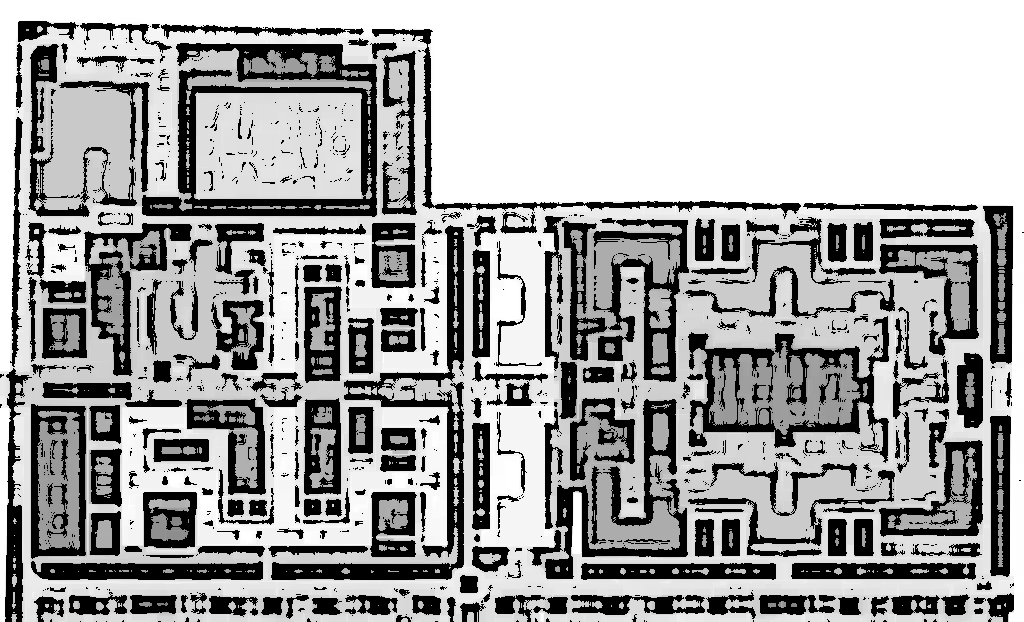

In [ ]:
#masking in binary segmentation image
import cv2

# Load the original image
original_image = cv2.imread('BU segment.png')

# Load the binary segmentation mask (0 for background, 255 for segmented regions)
segmentation_mask = cv2.imread('map.png', cv2.IMREAD_GRAYSCALE)

# Create a masked image by applying the mask to the original image
masked_image = cv2.bitwise_and(original_image, original_image, mask=segmentation_mask)

# Save or display the resulting masked image
cv2.imwrite('masked_image.png', masked_image)
cv2_imshow(masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


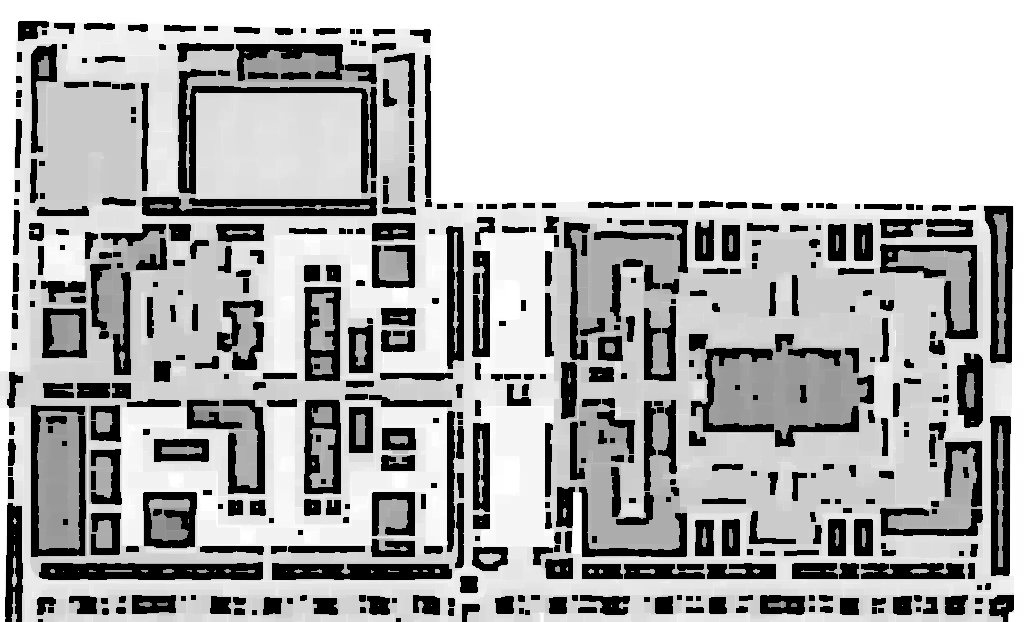

In [ ]:
#Preprocessing the masked image
import cv2
import numpy as np

# Load the masked image
masked_image = cv2.imread('masked_image.png', cv2.IMREAD_GRAYSCALE)

# Define the kernel for morphological operations (adjust the kernel size as needed)
kernel = np.ones((5, 5), np.uint8)

# Apply dilation to thicken the boundaries
dilated_mask = cv2.dilate(masked_image, kernel, iterations=1)

# Apply erosion to reduce noise and refine the boundaries
refined_mask = cv2.erode(dilated_mask, kernel, iterations=1)

# Save or display the refined mask
cv2.imwrite('refined_mask.png', refined_mask)
cv2_imshow(refined_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


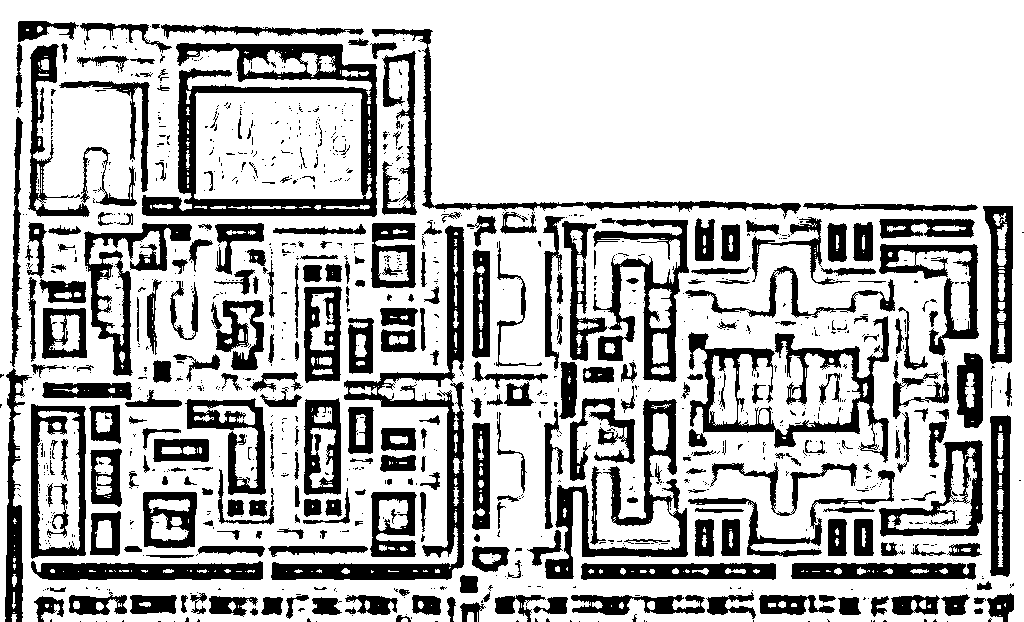

In [ ]:
#Thresholded the refined mask image
import cv2
import numpy as np

# Load the masked image
masked_image = cv2.imread('masked_image.png', cv2.IMREAD_GRAYSCALE)

# Set the threshold value (adjust as needed)
threshold_value = 128

# Apply binary thresholding
_, thresholded_mask = cv2.threshold(masked_image, threshold_value, 255, cv2.THRESH_BINARY)

# Save or display the thresholded mask
cv2.imwrite('thresholded_mask.png', thresholded_mask)
cv2_imshow(thresholded_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


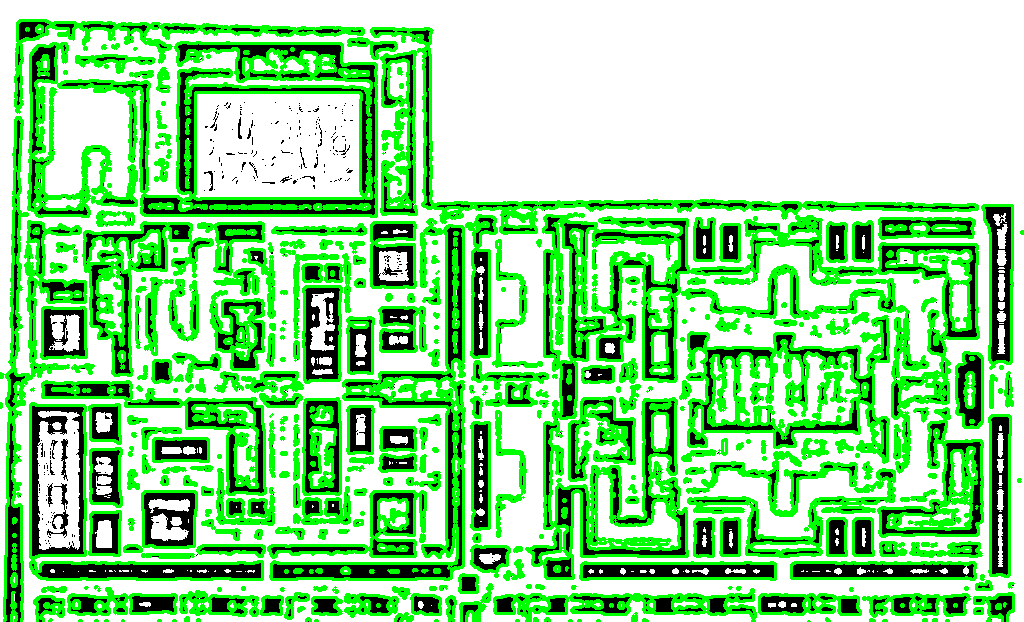

In [ ]:
#Extract mask boundaries from masked image
import cv2
import numpy as np

# Load the image
image = cv2.imread('thresholded_mask.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (e.g., Canny)
edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw contours on
image_with_contours = image.copy()

# Draw the contours on the image
cv2.drawContours(image_with_contours, contours, -1, (0,255, 0), 2)  # You can change the color and thickness

# Save or display the image with contours
cv2.imwrite('image_with_contours.jpg', image_with_contours)
cv2_imshow(image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!pip install svgwrite

In [ ]:
#vectorization
import cv2
import numpy as np
import svgwrite

# Load the raster image
image = cv2.imread('image_with_contours.jpg', cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Edge detection
    edges = cv2.Canny(image, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an SVG drawing
    svg_image = svgwrite.Drawing('vector_image.svg', profile='tiny', size=(image.shape[1], image.shape[0]))

    # Convert contours to SVG paths
    for contour in contours:
        path_data = "M "
        for point in contour:
            path_data += f"{point[0][0]},{point[0][1]} "
        svg_image.add(svgwrite.path.Path(d=path_data, fill="none", stroke="black"))

    # Save the SVG image
    svg_image.save()
else:
    print("Failed to load the image.")



In [ ]:
#convert svg file to dxf file
import ezdxf
import xml.etree.ElementTree as ET

def svg_path_to_coordinates(path_data):
    coordinates = []
    current_x, current_y = 0, 0
    commands = path_data.split()

    for i in range(len(commands)):
        command = commands[i]
        if command == 'M':
            coords = commands[i + 1].split(',')
            current_x = float(coords[0])
            current_y = float(coords[1])
            coordinates.append((current_x, current_y))
        elif command == 'L':
            coords = commands[i + 1].split(',')
            current_x = float(coords[0])
            current_y = float(coords[1])
            coordinates.append((current_x, current_y))
        elif command == 'Z':
            # Close the path, return to the initial point
            coordinates.append((coordinates[0][0], coordinates[0][1]))

    return coordinates

# Define the paths to the input SVG file and the output DXF file
input_svg_file = 'vector_image.svg'
output_dxf_file = 'output_vector.dxf'

# Create a new DXF document
doc = ezdxf.new()

# Create a new DXF layout (a drawing)
msp = doc.modelspace()

# Load the SVG file and extract its content
tree = ET.parse(input_svg_file)
root = tree.getroot()

# Iterate through the SVG elements and extract path data
for element in root:
    if element.tag.endswith('path'):
        # Extract the 'd' attribute which contains path data
        path_data = element.get('d')

        # Convert the SVG path data to a list of (x, y) coordinates
        coordinates = svg_path_to_coordinates(path_data)

        # Add the path as a polyline to the DXF document
        msp.add_lwpolyline(coordinates)

# Save the DXF file
doc.saveas(output_dxf_file)

print(f'DXF file saved as {output_dxf_file}')
